In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
import sys
from pathlib import Path

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
src_path: str = "/home/uziel/Development/goi-strat/src"
sys.path.insert(0, src_path)

In [3]:
from components.functional_analysis.orgdb import OrgDB

org_db = OrgDB("Homo sapiens")
root = Path("/mnt/d/phd_data/")
pcta_wcdt_root = root.joinpath("PCTA-WCDT_FOLH1")
tcga_root = root.joinpath("TCGA-PRAD_MethArray_FOLH1")
wcdt_root = root.joinpath("WCDT-MCRPC_FOLH1")
PALETTE_STR: str = "coolwarm"  # coolwarm or flare

sns.set_theme(style="whitegrid", palette=PALETTE_STR)
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Ubuntu Mono"
plt.rcParams["font.monospace"] = "Ubuntu Mono"

In [4]:
pcta_wcdt_figs_path = pcta_wcdt_root.joinpath("manuscript_figures")
pcta_wcdt_figs_path.mkdir(parents=True, exist_ok=True)
pcta_wcdt_add_files_path = pcta_wcdt_root.joinpath("supplementary_files")
pcta_wcdt_add_files_path.mkdir(parents=True, exist_ok=True)

## Sliding Window Line Plot

In [18]:
prim_summary = pd.read_csv("../prim_summary.csv", index_col=0)
prim_summary = prim_summary.median(axis=1)

met_summary = pd.read_csv("../met_summary.csv", index_col=0)
met_summary = met_summary.median(axis=1)

/home/uziel/miniforge3/envs/bioinfo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/uziel/miniforge3/envs/bioinfo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


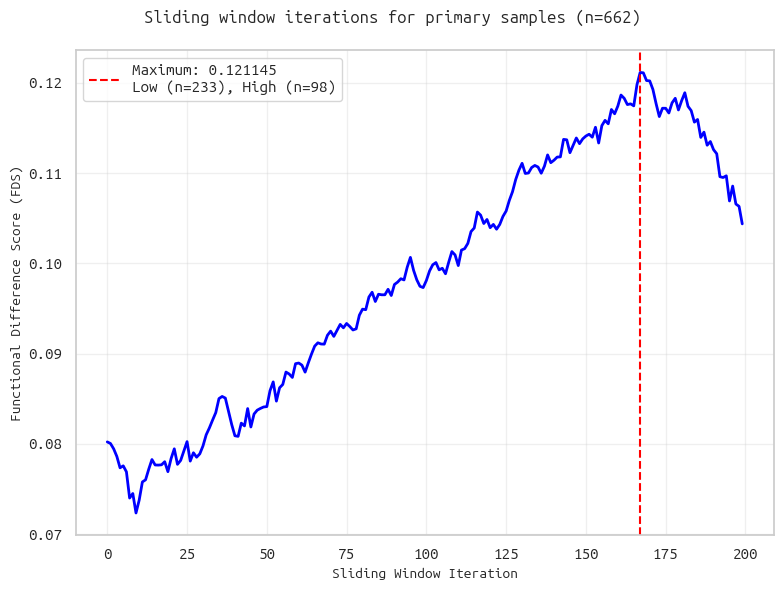

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the line plot
plt.figure(figsize=(8, 6))

# Plot without index
sns.lineplot(data=prim_summary.values, color="blue", linewidth=2)

# Get max value and its index
max_value = prim_summary.max()
max_index = prim_summary.idxmax()

# Format the index string
low, _, high = str(max_index).split("_")
formatted_index = f"Low (n={low}), High (n={high})"

# Add vertical line at maximum value position
plt.axvline(
    x=prim_summary.index.get_loc(max_index),
    color="red",
    linestyle="--",
    label=f"Maximum: {max_value:.6f}\n{formatted_index}",
)

# Customize the plot
plt.suptitle("Sliding window iterations for primary samples (n=662)", fontsize=12)
plt.xlabel("Sliding Window Iteration", fontsize=10)
plt.ylabel("Functional Difference Score (FDS)", fontsize=10)
plt.grid(True, alpha=0.3)
plt.legend(loc="upper left")

# Show the plot
plt.tight_layout()
plt.show()

In [30]:
prim_summary

66_331_265    0.080228
67_331_264    0.080052
68_331_263    0.079462
69_331_262    0.078615
70_331_261    0.077359
                ...   
261_331_70    0.106912
262_331_69    0.108559
263_331_68    0.106576
264_331_67    0.106312
265_331_66    0.104373
Length: 200, dtype: float64